1. What are Type I and Type II errors in hypothesis testing, and how do they impact decision-making?
   - Type I Error (Alpha): Occurs when you reject the null hypothesis (H0) when it is actually true (a "false positive"). The maximum probability of this error is the significance level (alpha), typically 0.05.
   - Type II Error (Beta): Occurs when you fail to reject the null hypothesis (H0) when the alternative hypothesis (Ha) is actually true (a "false negative").
   - Impact on Decision-Making:
   - Type I: Leads to unwarranted changes, such as launching an expensive new drug that is actually ineffective, or convicting an innocent person. It increases risk and cost.
   - Type II: Leads to missed opportunities, such as discarding an effective drug or failing to detect a real problem. It increases lost potential benefit or continued harm.

2. What is the P-value in hypothesis testing, and how should it be interpreted in the context of the null hypothesis?
   - The P-value (Probability Value) is the probability of observing test results at least as extreme as the results actually observed, assuming that the null hypothesis (H0) is true.
   - Interpretation: P-value <= Significance Level: The result is considered statistically significant. You reject the null hypothesis because the observed data is unlikely to have occurred if H0 were true.
   - P-value > Significance Level: You fail to reject the null hypothesis because the observed data is reasonably likely to occur if H0 were true. (Note: Failing to reject H0 does not mean H0 is proven true).

3. Explain the difference between a Z-test and a T-test, including when to use each.
   - Z Test: Used when the population standard deviation is known or when the sample size is large. This uses the Standard Normal (Z) Distribution.
   - T Test: Used when the population standard deviation is unknown and must be estimated from the sample data. Uses the Student's T-Distribution, which has heavier tails than the Z-distribution, especially for small sample sizes.

4. What is a confidence interval, and how does the margin of error influence its width and interpretation?
   - A confidence interval (CI) is a range of values, derived from a sample, that is likely to contain the true value of an unknown population parameter (like the mean). It is expressed with a confidence level, which represents the percentage of all possible samples that would produce a CI containing the true population parameter.
   - Margin of Error (ME):The CI is calculated as: Sample Statistic +/- Margin of Error. The ME is the half-width of the confidence interval.
   - Wider CI: A larger Margin of Error (often caused by a smaller sample size, higher confidence level, or higher data variability) results in a wider CI. This provides higher confidence but less precision.
   - Narrower CI: A smaller Margin of Error results in a narrower CI. This provides greater precision but lower confidence.

5. Describe the purpose and assumptions of an ANOVA test. How does it extend hypothesis testing to more than two groups?
   - Purpose:ANOVA (Analysis of Variance) is a statistical test used to determine whether there are any statistically significant differences between the means of two or more independent groups. It does this by comparing the variance between the groups to the variance within the groups.
   - Assumptions
   - Independence: The samples are drawn independently of each other.
   - Normality: The populations from which the samples are drawn are approximately normally distributed.
   - Homogeneity of Variances (Homoscedasticity): The population variances (spreads) of the groups are equal.

   - Extension to More Than Two Groups: Standard two-sample T-tests can only compare the means of two groups at a time. To test three or more groups (A vs B, A vs C, B vs C) using multiple T-tests increases the risk of a Type I Error (false positive) due to the multiple comparisons problem. ANOVA performs a single, omnibus test that maintains the specified alpha level, determining if at least one group mean is different from the others.
   - If ANOVA yields a significant result, post-hoc tests (like Tukey's HSD) are then used to identify exactly which pairs of groups differ.

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest

In [5]:
# 6. Write a Python program to perform a one-sample Z-test and interpret the result for a given dataset. 

plt.style.use('seaborn-v0_8-whitegrid')

def perform_one_sample_ztest():
    # Sample dataset (e.g., student test scores)
    np.random.seed(42)
    sample_data = np.random.normal(loc=75, scale=10, size=50) 
    
    null_hypothesis_mean = 70
    alpha = 0.05
    z_score, p_value = ztest(sample_data, value=null_hypothesis_mean)
    
    print(f"Sample Mean (X̄): {sample_data.mean():.2f}")
    print(f"Hypothesized Population Mean (μ₀): {null_hypothesis_mean}")
    print(f"Calculated Z-Score: {z_score:.4f}")
    print(f"Calculated P-Value: {p_value:.4f}")
    
    if p_value < alpha:
        interpretation = f"Since the P-value ({p_value:.4f}) is less than alpha ({alpha}), we reject the null hypothesis."
        conclusion = "Conclusion: There is statistically significant evidence that the true population mean is different from 70."
    else:
        interpretation = f"Since the P-value ({p_value:.4f}) is greater than alpha ({alpha}), we fail to reject the null hypothesis."
        conclusion = "Conclusion: There is not enough evidence to claim that the true population mean is different from 70."
        
    print(f"\nInterpretation: {interpretation}")
    print(conclusion)
    print("-" * 40)
    return sample_data

perform_one_sample_ztest()    

Sample Mean (X̄): 72.75
Hypothesized Population Mean (μ₀): 70
Calculated Z-Score: 2.0791
Calculated P-Value: 0.0376

Interpretation: Since the P-value (0.0376) is less than alpha (0.05), we reject the null hypothesis.
Conclusion: There is statistically significant evidence that the true population mean is different from 70.
----------------------------------------


array([79.96714153, 73.61735699, 81.47688538, 90.23029856, 72.65846625,
       72.65863043, 90.79212816, 82.67434729, 70.30525614, 80.42560044,
       70.36582307, 70.34270246, 77.41962272, 55.86719755, 57.75082167,
       69.37712471, 64.8716888 , 78.14247333, 65.91975924, 60.87696299,
       89.65648769, 72.742237  , 75.67528205, 60.75251814, 69.55617275,
       76.1092259 , 63.49006423, 78.75698018, 68.9936131 , 72.0830625 ,
       68.98293388, 93.52278185, 74.86502775, 64.42289071, 83.22544912,
       62.7915635 , 77.08863595, 55.40329876, 61.71813951, 76.96861236,
       82.3846658 , 76.71368281, 73.84351718, 71.98896304, 60.2147801 ,
       67.80155792, 70.39361229, 85.57122226, 78.4361829 , 57.36959845])

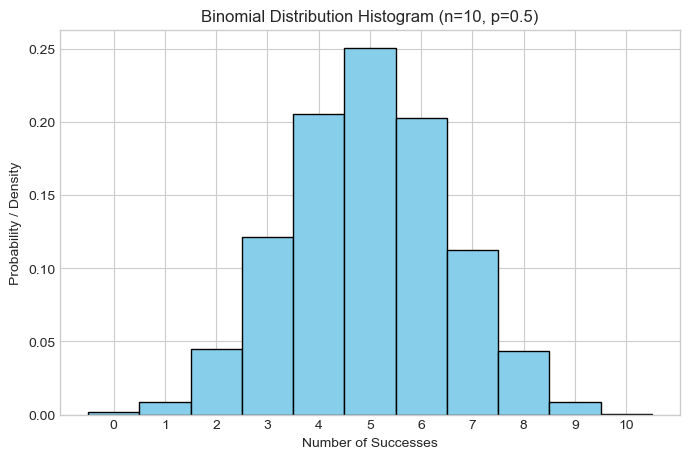

Simulated 10000 samples from Binomial(n=10, p=0.5) and plotted the histogram.
----------------------------------------


In [6]:
# 7. Simulate a dataset from a binomial distribution (n = 10, p = 0.5) using NumPy and plot the histogram.

def simulate_binomial_distribution():
    n_trials = 10
    p_success = 0.5
    n_samples = 10000
    
    data_binomial = np.random.binomial(n=n_trials, p=p_success, size=n_samples)
    
    plt.figure(figsize=(8, 5))
    plt.hist(data_binomial, bins=np.arange(-0.5, n_trials + 1.5, 1), 
             edgecolor='black', color='skyblue', density=True)
    plt.title(f'Binomial Distribution Histogram (n={n_trials}, p={p_success})')
    plt.xlabel('Number of Successes')
    plt.ylabel('Probability / Density')
    plt.xticks(np.arange(0, n_trials + 1, 1))
    plt.show(block=False)
    
    print(f"Simulated {n_samples} samples from Binomial(n={n_trials}, p={p_success}) and plotted the histogram.")
    print("-" * 40)

simulate_binomial_distribution()

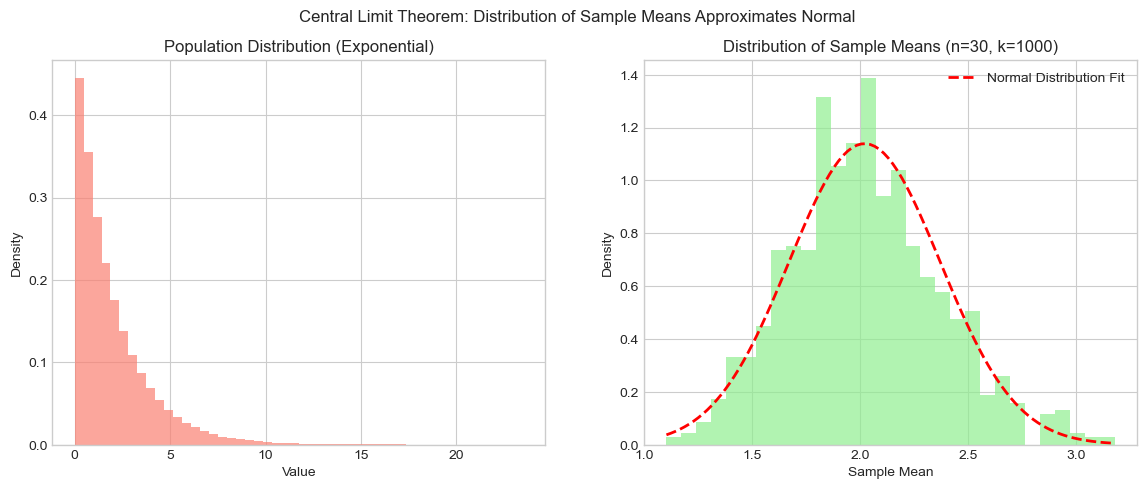

Demonstrated CLT: Sample means from a non-normal (Exponential) population form a Normal distribution.
----------------------------------------


In [7]:
# 8. Generate multiple samples from a non-normal distribution and implement the Central Limit Theorem using Python. 

def demonstrate_central_limit_theorem():
    population_size = 100000
    sample_size = 30
    num_samples = 1000
    np.random.seed(42)
    population = np.random.exponential(scale=2, size=population_size)
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(population, size=sample_size)
        sample_means.append(sample.mean())
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].hist(population, bins=50, density=True, color='salmon', alpha=0.7)
    axes[0].set_title(f'Population Distribution (Exponential)')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Density')
    
    axes[1].hist(sample_means, bins=30, density=True, color='lightgreen', alpha=0.7)
    mu = np.mean(sample_means)
    sigma = np.std(sample_means)
    x_clt = np.linspace(min(sample_means), max(sample_means), 100)
    pdf = stats.norm.pdf(x_clt, mu, sigma)
    axes[1].plot(x_clt, pdf, 'r--', linewidth=2, label='Normal Distribution Fit')
    
    axes[1].set_title(f'Distribution of Sample Means (n={sample_size}, k={num_samples})')
    axes[1].set_xlabel('Sample Mean')
    axes[1].set_ylabel('Density')
    axes[1].legend()
    
    plt.suptitle("Central Limit Theorem: Distribution of Sample Means Approximates Normal")
    plt.show(block=False)
    
    print("Demonstrated CLT: Sample means from a non-normal (Exponential) population form a Normal distribution.")
    print("-" * 40)

demonstrate_central_limit_theorem()

Sample Mean (X̄): 72.75
Hypothesized Population Mean (μ₀): 70
Calculated Z-Score: 2.0791
Calculated P-Value: 0.0376

Interpretation: Since the P-value (0.0376) is less than alpha (0.05), we reject the null hypothesis.
Conclusion: There is statistically significant evidence that the true population mean is different from 70.
----------------------------------------
Sample Size (n): 50
Sample Mean (X̄): 72.75
Sample Std Dev (s): 9.34
T-Critical Value: 2.0096
Margin of Error: 2.65
95% Confidence Interval: (70.09, 75.40)


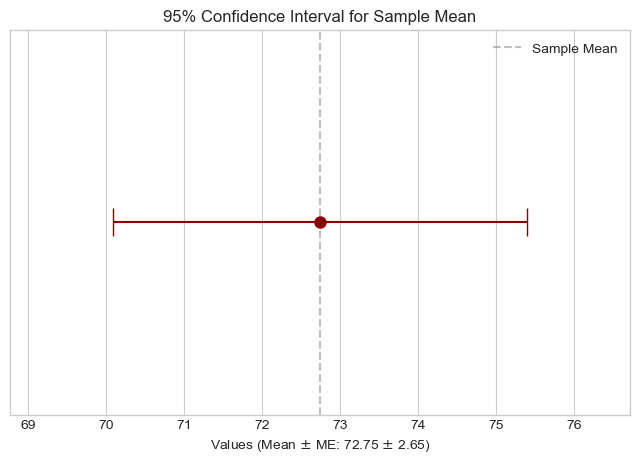

Confidence interval has been calculated and visualized.
----------------------------------------


(np.float64(70.0918036285815), np.float64(75.39871826629569))

In [8]:
# 9. Write a Python function to calculate and visualize the confidence interval for a sample mean.

def calculate_and_visualize_ci(data, confidence_level=0.95):
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    n = len(data)
    degrees_freedom = n - 1
    alpha = 1 - confidence_level
    t_critical = stats.t.ppf(1 - alpha / 2, degrees_freedom)
    standard_error = sample_std / np.sqrt(n)
    margin_of_error = t_critical * standard_error
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error
    
    print(f"Sample Size (n): {n}")
    print(f"Sample Mean (X̄): {sample_mean:.2f}")
    print(f"Sample Std Dev (s): {sample_std:.2f}")
    print(f"T-Critical Value: {t_critical:.4f}")
    print(f"Margin of Error: {margin_of_error:.2f}")
    print(f"{confidence_level*100:.0f}% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")
    
    plt.figure(figsize=(8, 5))
    plt.errorbar(x=sample_mean, y=0, xerr=margin_of_error, fmt='o', color='darkred', capsize=10, markersize=8)
    plt.title(f'{confidence_level*100:.0f}% Confidence Interval for Sample Mean')
    plt.yticks([]) # Hide y-axis ticks
    plt.xlabel(f'Values (Mean $\pm$ ME: {sample_mean:.2f} $\pm$ {margin_of_error:.2f})')
    plt.xlim(ci_lower - standard_error, ci_upper + standard_error)
    plt.axvline(sample_mean, color='gray', linestyle='--', alpha=0.5, label='Sample Mean')
    plt.legend()
    plt.show(block=False)
    
    print("Confidence interval has been calculated and visualized.")
    print("-" * 40)
    return ci_lower, ci_upper

sample_data = perform_one_sample_ztest()
calculate_and_visualize_ci(sample_data)

In [9]:
# 10. Perform a Chi-square goodness-of-fit test using Python to compare observed and expected distributions, and explain the outcome. 

def perform_chi_square_test():
    observed_clicks = [55, 45, 60, 40]
    total_obs = sum(observed_clicks)
    expected_clicks = [total_obs / len(observed_clicks)] * len(observed_clicks)
    chi2_stat, p_value = stats.chisquare(f_obs=observed_clicks, f_exp=expected_clicks)
    
    alpha = 0.05
    
    print(f"Observed Frequencies: {observed_clicks}")
    print(f"Expected Frequencies: {expected_clicks}")
    print(f"Chi-square Statistic (χ²): {chi2_stat:.4f}")
    print(f"P-Value: {p_value:.4f}")
    if p_value < alpha:
        interpretation = f"Since the P-value ({p_value:.4f}) is less than alpha ({alpha}), we reject the null hypothesis."
        conclusion = "Conclusion: The observed click distribution is statistically different from the expected uniform distribution. The difference is significant."
    else:
        interpretation = f"Since the P-value ({p_value:.4f}) is greater than alpha ({alpha}), we fail to reject the null hypothesis."
        conclusion = "Conclusion: The observed click distribution is consistent with the expected uniform distribution. The difference is likely due to random chance."
        
    print(f"\nInterpretation: {interpretation}")
    print(conclusion)
    print("-" * 40)

perform_chi_square_test()

Observed Frequencies: [55, 45, 60, 40]
Expected Frequencies: [50.0, 50.0, 50.0, 50.0]
Chi-square Statistic (χ²): 5.0000
P-Value: 0.1718

Interpretation: Since the P-value (0.1718) is greater than alpha (0.05), we fail to reject the null hypothesis.
Conclusion: The observed click distribution is consistent with the expected uniform distribution. The difference is likely due to random chance.
----------------------------------------
